In [3]:
# from os import remove
# from numpy import identity
import tiled
from tiled.client import from_uri
from aimm_post_processing.operations import (
    Pull,
    Identity,
    RemoveBackground, 
    StandardizeGrid,
    StandardizeIntensity
)
from aimm_post_processing.pipeline import Pipeline

%reload_ext autoreload
%autoreload 1
%aimport aimm_post_processing.pipeline
%aimport aimm_post_processing.operations
%aimport isstools.xasproject.xasproject

In [4]:
client = from_uri("https://aimm.lbl.gov/api")
view = client['dataset']['newville']['uid']['cCv65Ngs86N']

<AxesSubplot:xlabel='energy'>

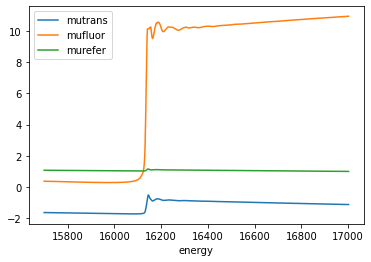

In [35]:
df = view.read()
df.plot(x="energy", y=["mutrans", "mufluor", "murefer"])

# Operation Chains

In [19]:
pull = Pull()
identity = Identity()
standardizegrid = StandardizeGrid(
    x0=15700, 
    xf=17000, 
    nx=1301,
    x_column="energy",
    y_columns=["mutrans", "mufluor", "murefer"]
)
removebackground = RemoveBackground(
    x0=15700, 
    xf=15800, 
    x_column="energy",
    y_columns=["mutrans", "mufluor", "murefer"],
    victoreen_order=0
)
standardizeintensity = StandardizeIntensity(
    x0=15700,
    xf=15800,
    x_column="energy",
    y_columns=["mutrans", "mufluor", "murefer"]
)

In [38]:
pipe0 = Pipeline(
    [
        pull,
        standardizegrid,
        removebackground
    ]
)

In [39]:
d = pipe0.run(view)

<AxesSubplot:xlabel='energy'>

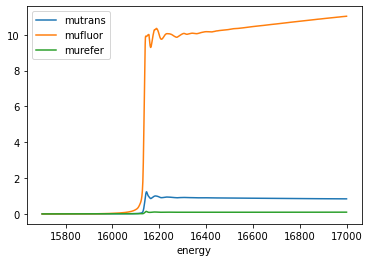

In [40]:
d["data"].plot(x="energy", y=["mutrans", "mufluor", "murefer"])

In [41]:
d["metadata"]["sample"]

{'_id': 'ekNDw7Dr8Ln',
 'name': 'strontium oxide',
 'dataset': 'newville',
 'provenance': {'source': 'newville',
  'url': 'https://github.com/XraySpectroscopy/XASDataLibrary',
  'license': None,
  'description': None},
 'formula': 'SrO',
 'reference': 'SrCO3',
 'prep': 'powder',
 'temperature': 'room temperature'}

In [42]:
d["metadata"]["post_processing"]

{0: {'id': '2a03a91a-6e0c-4a15-b190-76f866610e22',
  'parent': 'ekNDw7Dr8Ln',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'Pull',
   '@version': '0.post26.dev0+g23aac4a'},
  'kwargs': {},
  'datetime': '2022-06-10 17:15:58 UTC'},
 1: {'id': '82f050c6-ed74-41cb-8ec4-30a6028aa6bb',
  'parent': '2a03a91a-6e0c-4a15-b190-76f866610e22',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'StandardizeGrid',
   '@version': '0.post26.dev0+g23aac4a',
   'x0': 15700,
   'xf': 17000,
   'nx': 1301,
   'interpolated_univariate_spline_kwargs': {},
   'x_column': 'energy',
   'y_columns': ['mutrans', 'mufluor', 'murefer'],
   '__class__': aimm_post_processing.operations.StandardizeGrid},
  'kwargs': {'x0': 15700,
   'xf': 17000,
   'nx': 1301,
   'interpolated_univariate_spline_kwargs': {},
   'x_column': 'energy',
   'y_columns': ['mutrans', 'mufluor', 'murefer'],
   '__class__': aimm_post_processing.operations.StandardizeGrid},
  'datetime': '2022

In [43]:
pipe1 = Pipeline(
    [
        identity,
        standardizegrid,
        standardizeintensity
    ]
)

In [44]:
d = pipe1.run(d)

<AxesSubplot:xlabel='energy'>

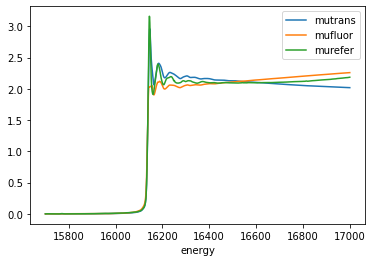

In [45]:
d["data"].plot(x="energy", y=["mutrans", "mufluor", "murefer"])

In [46]:
d["metadata"]["post_processing"]

{0: {'id': '7be5503d-534d-499b-8e30-3c3f754c0cdc',
  'parent': 'ekNDw7Dr8Ln',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'Identity',
   '@version': '0.post26.dev0+g23aac4a',
   '__class__': aimm_post_processing.operations.Identity},
  'kwargs': {'__class__': aimm_post_processing.operations.Identity},
  'datetime': '2022-06-10 17:16:13 UTC'},
 1: {'id': '5561f5c0-56af-4999-83aa-53710645b14b',
  'parent': '7be5503d-534d-499b-8e30-3c3f754c0cdc',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'Identity',
   '@version': '0.post26.dev0+g23aac4a',
   '__class__': aimm_post_processing.operations.Identity},
  'kwargs': {'__class__': aimm_post_processing.operations.Identity},
  'datetime': '2022-06-10 17:16:13 UTC'},
 2: {'id': '9303b0c8-b993-41d3-818a-d4271dd978aa',
  'parent': '5561f5c0-56af-4999-83aa-53710645b14b',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'StandardizeGrid',
   '@version': '0.post26.dev0

# Pipeline Chains

In [13]:
pipe2 = Pipeline(
    [
        pull,
        standardizegrid,
    ]
)
pipe3 = Pipeline(
    [
        removebackground,
        standardizeintensity
    ]
)
pipe4 = pipe2 + pipe3

In [14]:
d = pipe4.run(view)

<AxesSubplot:xlabel='energy'>

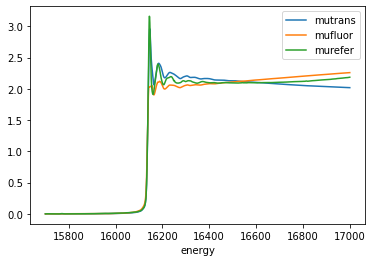

In [15]:
d["data"].plot(x="energy", y=["mutrans", "mufluor", "murefer"])

In [26]:
d["metadata"]["post_processing"]

{0: {'id': 'd961bba2-4847-4163-9348-b82fb4231778',
  'parent': 'ekNDw7Dr8Ln',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'Pull',
   '@version': '0.post24.dev0+g044f3af'},
  'datetime': '2022-06-09 20:38:32 UTC'},
 1: {'id': 'b6a57c4f-e11b-4068-bce5-d72983577c13',
  'parent': 'd961bba2-4847-4163-9348-b82fb4231778',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'Identity',
   '@version': '0.post24.dev0+g044f3af'},
  'datetime': '2022-06-09 20:38:32 UTC'},
 2: {'id': '33b32e39-6c7d-4fb4-a6e7-021821f70bf8',
  'parent': 'b6a57c4f-e11b-4068-bce5-d72983577c13',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'StandardizeGrid',
   '@version': '0.post24.dev0+g044f3af',
   'x0': 15700,
   'xf': 17000,
   'nx': 1301,
   'interpolated_univariate_spline_kwargs': {},
   'x_column': 'energy',
   'y_columns': ['mutrans', 'mufluor', 'murefer']},
  'datetime': '2022-06-09 20:38:32 UTC'},
 3: {'id': '458386f3-4cbc-4056-9